In [1]:
import pandas as pd
from scipy.stats import kruskal
from scipy import stats
import statistics
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("imputed_cleaned_df.csv")
df=df.drop(["Unnamed: 0"],axis=1)
df = df.dropna(axis = 1)
df

,Date,"Population, male (% of total population)",Population growth (annual %),"Population ages 35-39, male (% of male population)","Population ages 30-34, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 25-29, female (% of female population)","Population ages 20-24, male (% of male population)","Population ages 20-24, female (% of female population)",...,"Survival to age 65, male (% of cohort)","Survival to age 65, female (% of cohort)","Life expectancy at birth, total (years)","Life expectancy at birth, female (years)",Domestic general government health expenditure (% of current health expenditure),People using at least basic sanitation services (% of population),"Immunization, measles (% of children ages 12-23 months)","Immunization, DPT (% of children ages 12-23 months)",People using at least basic drinking water services (% of population),Country
0,31/12/2000,58.974590,2.751576,10.580224,10.970504,9.675833,11.124948,9.560886,9.914067,9.630265,...,80.639037,86.010189,75.496,77.480,71.090942,99.927678,98.0,97.0,99.910081,Bahrain
1,31/12/2001,59.040721,2.610263,10.523844,11.257000,9.751845,11.371230,9.586186,9.581943,9.695009,...,81.744027,86.255087,75.908,77.669,71.686089,99.933661,98.0,99.0,99.917519,Bahrain
2,31/12/2002,59.124390,2.443951,10.564876,11.625352,9.856252,11.507597,9.615963,9.144013,9.702925,...,81.960392,86.616617,76.088,77.908,71.251640,99.939643,99.0,98.0,99.924957,Bahrain
3,31/12/2003,59.378020,3.921948,10.604646,11.901189,9.866896,11.566314,9.674419,9.135526,9.741478,...,82.677625,86.639676,76.337,77.970,65.968887,99.945626,99.0,97.0,99.932395,Bahrain
4,31/12/2004,59.890503,6.851939,10.546060,11.983681,9.706156,11.770021,9.837179,10.018271,9.963415,...,83.000012,87.118620,76.560,78.253,67.336205,99.951608,99.0,98.0,99.939833,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,31/12/2017,57.990086,2.298161,11.517680,8.777666,8.302687,8.091223,9.489505,6.653577,8.507995,...,83.388476,87.108272,77.160,78.796,71.847023,99.958489,96.0,98.0,99.868177,Saudi Arabia
106,31/12/2018,58.071328,2.384150,11.232653,8.801515,8.392500,8.084394,9.675802,6.850205,8.520168,...,83.257354,87.153359,77.212,78.911,70.298500,100.000000,98.0,96.0,100.000000,Saudi Arabia
107,31/12/2019,58.156916,2.284589,11.000090,8.847927,8.518446,8.111693,9.821838,7.001659,8.552202,...,83.420512,86.973024,77.304,78.909,70.298500,100.000000,95.0,96.0,100.000000,Saudi Arabia
108,31/12/2020,58.023696,0.472667,10.625665,8.620229,8.572281,7.808939,9.607992,6.687719,8.320317,...,81.632940,85.652908,76.239,77.992,70.298500,100.000000,96.0,95.0,100.000000,Saudi Arabia


## Removing few indicators if there are multiple indicators having highly positive or negative correlation

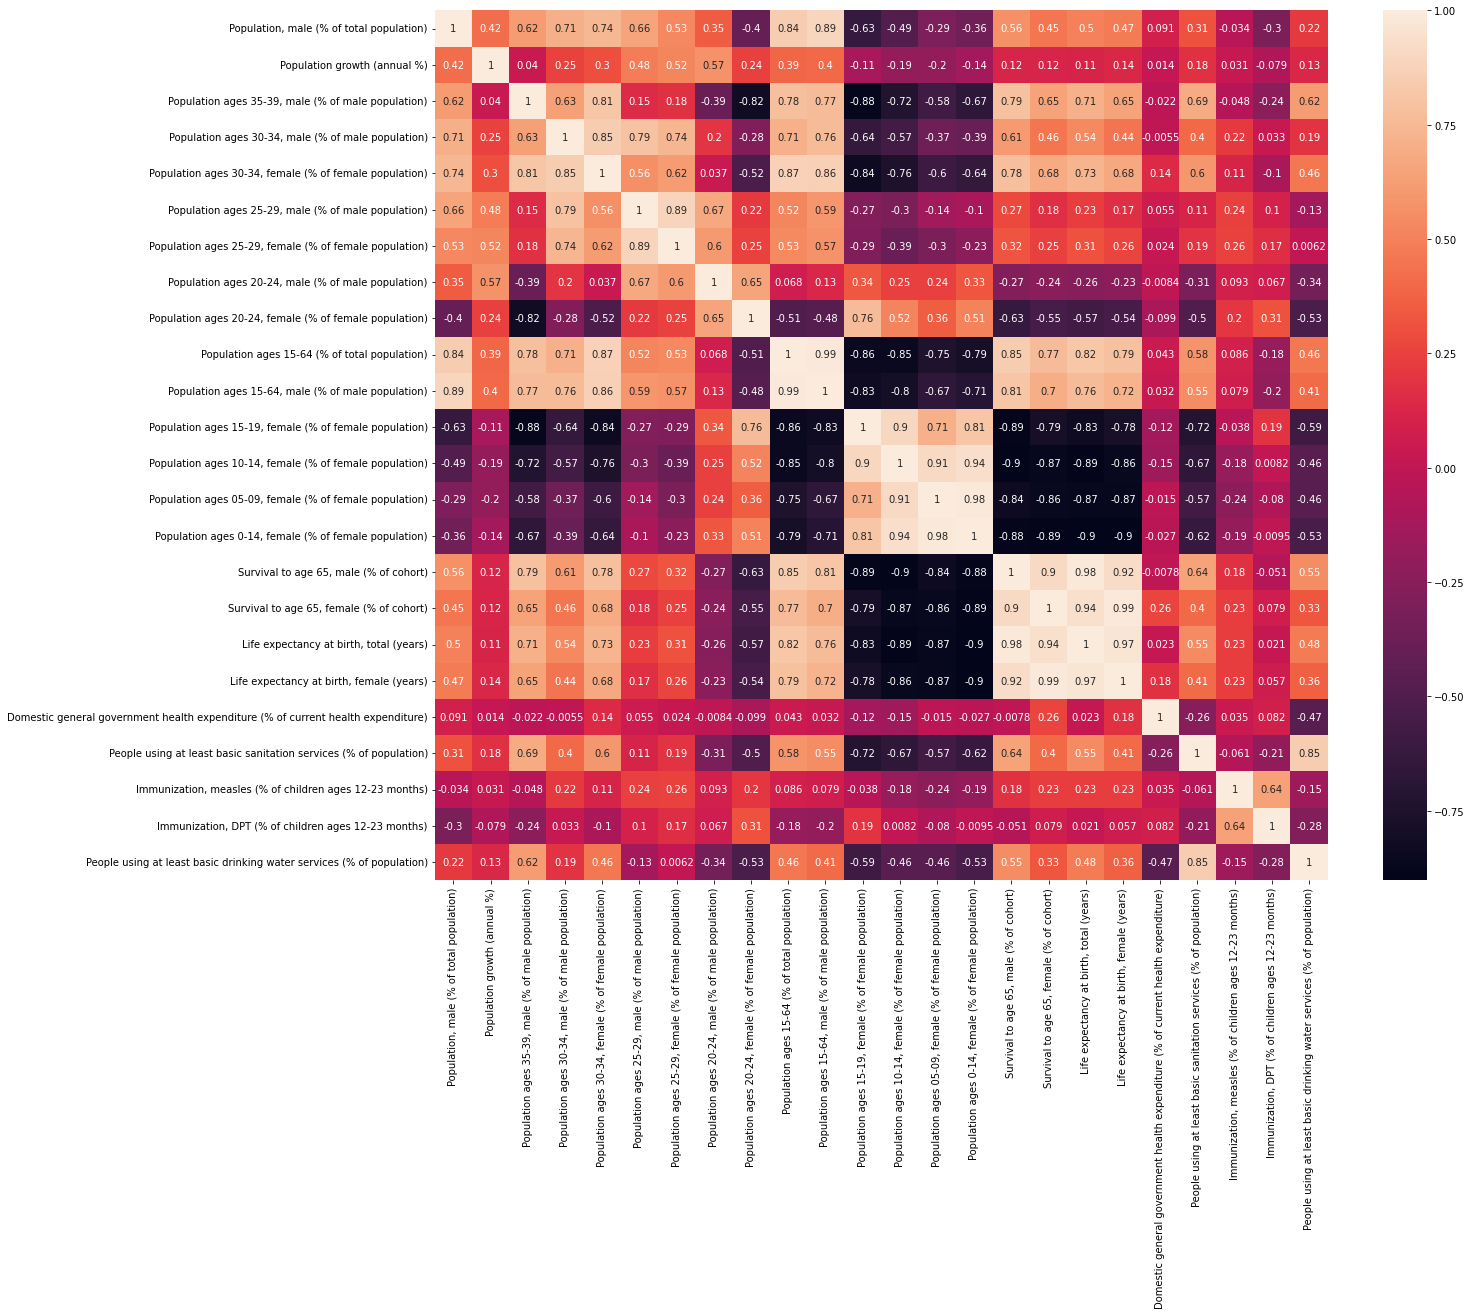

In [3]:
# plotting correlation heatmap
plt.figure(figsize=(20, 16))
dataplot = sb.heatmap(df.corr(),annot=True)
  
# displaying heatmap
plt.show()

In [4]:
features=['People using at least basic sanitation services (% of population)', 
          'Immunization, measles (% of children ages 12-23 months)', 
          'People using at least basic drinking water services (% of population)', 
          'Immunization, DPT (% of children ages 12-23 months)', 
          'Survival to age 65, male (% of cohort)', 
          #'Survival to age 65, female (% of cohort)', 
          'Population ages 25-29, male (% of male population)', 
          'Population ages 20-24, female (% of female population)', 
          #'Life expectancy at birth, total (years)', 
          'Population ages 25-29, female (% of female population)', 
          #'Life expectancy at birth, female (years)', 
          'Population ages 30-34, male (% of male population)', 
          'Population ages 20-24, male (% of male population)', 
          'Population ages 30-34, female (% of female population)', 
          'Population ages 15-64, male (% of male population)', 
          #'Population ages 15-64 (% of total population)', 
          'Domestic general government health expenditure (% of current health expenditure)', 
          'Population ages 35-39, male (% of male population)', 
          'Population growth (annual %)',
          'Population ages 05-09, female (% of female population)', 
          #'Population ages 10-14, female (% of female population)', 
          #'Population ages 0-14, female (% of female population)', 
          'Population, male (% of total population)']
          #'Population ages 15-19, female (% of female population)']
len(features)

17

In [5]:
df=df.drop(['Survival to age 65, female (% of cohort)', #ok
            'Life expectancy at birth, total (years)',  #ok 
            'Life expectancy at birth, female (years)', #ok
            'Population ages 15-64 (% of total population)', #ok
            'Population ages 10-14, female (% of female population)', #ok
            'Population ages 0-14, female (% of female population)', #ok
            'Population ages 15-19, female (% of female population)'],axis=1) #ok

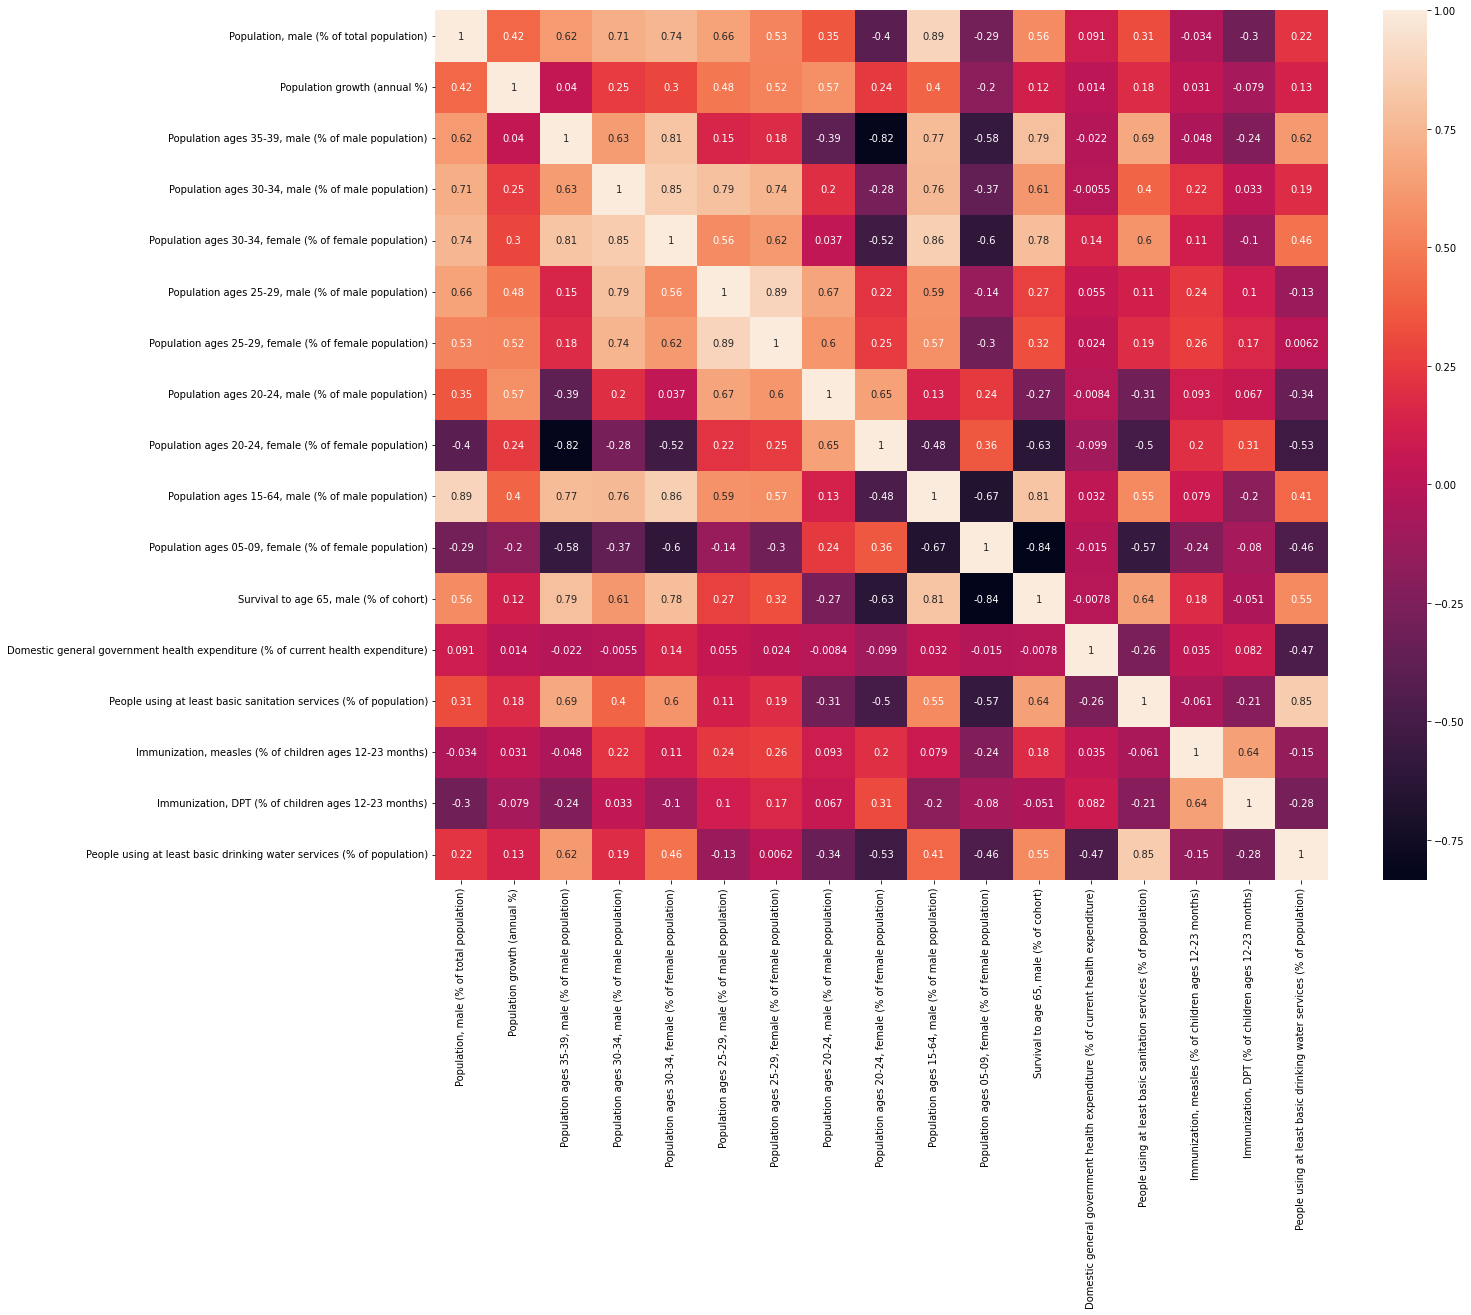

In [6]:
# plotting correlation heatmap
plt.figure(figsize=(20, 16))
dataplot = sb.heatmap(df.corr(),annot=True)
  
# displaying heatmap
plt.show()

In [7]:
features=['People using at least basic sanitation services (% of population)', 
          'Immunization, measles (% of children ages 12-23 months)', 
          'People using at least basic drinking water services (% of population)', 
          'Immunization, DPT (% of children ages 12-23 months)', 
          'Survival to age 65, male (% of cohort)', 
          #'Survival to age 65, female (% of cohort)', 
          'Population ages 25-29, male (% of male population)', 
          'Population ages 20-24, female (% of female population)', 
          #'Life expectancy at birth, total (years)', 
          #'Population ages 25-29, female (% of female population)', 
          'Population ages 30-34, male (% of male population)', 
          'Population ages 20-24, male (% of male population)', 
          'Population ages 30-34, female (% of female population)', 
          'Population ages 15-64, male (% of male population)', 
          'Domestic general government health expenditure (% of current health expenditure)', 
          'Population ages 35-39, male (% of male population)', 
          'Population growth (annual %)',
          'Population ages 05-09, female (% of female population)']
          #'Population, male (% of total population)']

len(features)

15

In [8]:
df=df.drop(['Population, male (% of total population)',
            'Population ages 25-29, female (% of female population)', ],axis=1)

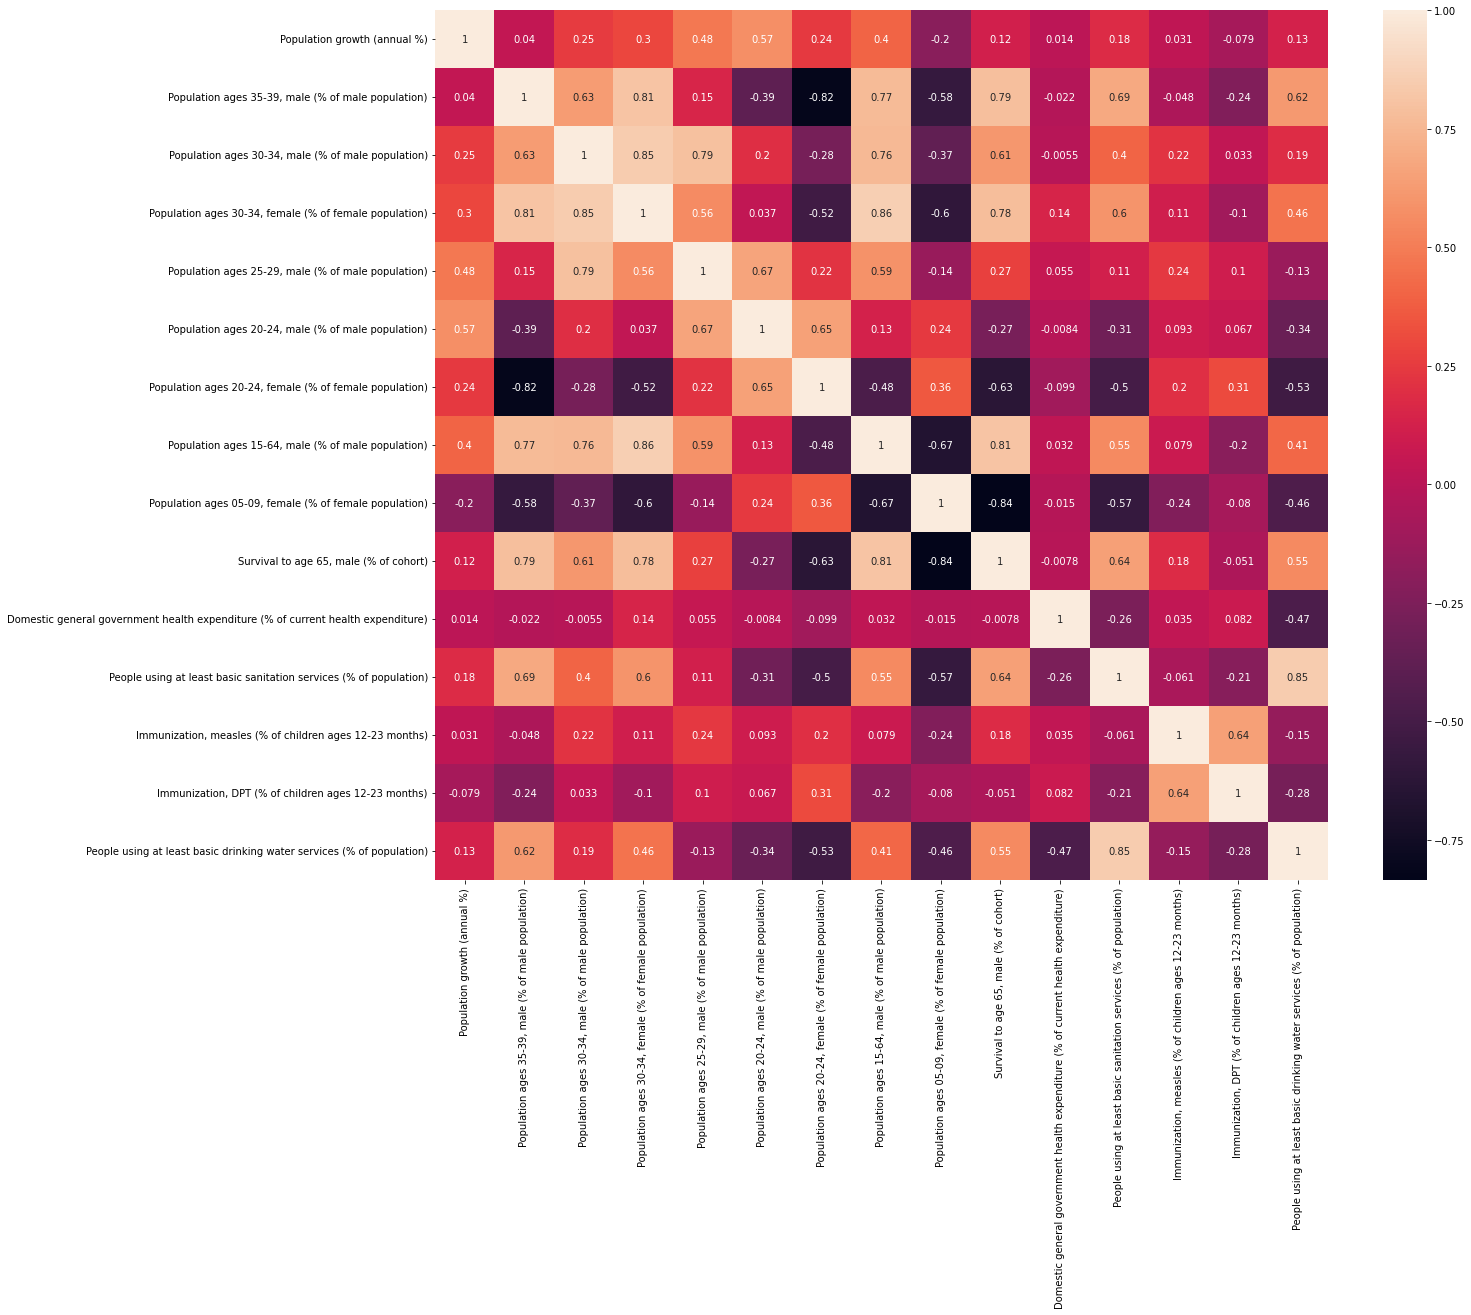

In [9]:
# plotting correlation heatmap
plt.figure(figsize=(20, 16))
dataplot = sb.heatmap(df.corr(),annot=True)
  
# displaying heatmap
plt.show()

In [10]:
df = df.replace('Saudi Arabia','SaudiArabia')
df.to_csv("imputed_cleaned_highly_correlated_removed_df.csv")

## Taking only 2000's data

In [11]:
filtered_df = df[df['Date'] == '31/12/2000']
filtered_df=filtered_df.reset_index()
filtered_df=filtered_df.drop(["Date","Country","index"],axis=1)
filtered_df

,Population growth (annual %),"Population ages 35-39, male (% of male population)","Population ages 30-34, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 20-24, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 15-64, male (% of male population)","Population ages 05-09, female (% of female population)","Survival to age 65, male (% of cohort)",Domestic general government health expenditure (% of current health expenditure),People using at least basic sanitation services (% of population),"Immunization, measles (% of children ages 12-23 months)","Immunization, DPT (% of children ages 12-23 months)",People using at least basic drinking water services (% of population)
0,2.751576,10.580224,10.970504,9.675833,11.124948,9.914067,9.630265,71.751589,11.584550,80.639037,71.090942,99.927678,98.0,97.0,99.910081
1,3.015394,10.688857,12.384154,10.108205,10.868411,10.327809,10.025421,73.418017,10.939282,83.294881,72.544716,100.000000,99.0,98.0,100.000000
2,1.359437,7.670861,8.653509,6.188789,9.574130,10.040506,10.444919,64.492877,14.423633,75.513128,81.751739,89.155843,99.0,99.0,85.638075
3,5.184450,12.826781,13.040582,9.653878,11.792123,8.721229,8.746618,80.711363,11.922149,80.789426,59.515396,100.000000,91.0,80.0,100.000000
4,2.527236,8.572086,10.583509,7.914699,11.627249,11.530790,10.292745,65.827057,14.469604,75.517309,72.052383,98.435396,94.0,95.0,97.467050


## Kruskal Wallis Test to find indicators for which we have non-significant difference between the countries for any period of time or 2000

In [13]:
new_indicators=filtered_df.columns.tolist()
len(new_indicators)

15

In [32]:
for i in range(len(new_indicators)):
#     if i>0:
#         break
    print("For indicator",new_indicators[i],":")

    # Define your list of values
    values=filtered_df[new_indicators[i]].tolist()
    
    bah=[values[0],values[0]]
    kuw=[values[1],values[1]]
    oma=[values[2],values[2]]
    qat=[values[3],values[3]]
    sau=[values[4],values[4]]
    
    #print("kruskal:")
    
#     dff=df.drop(["Date"],axis=1)
    
#     countries=df["Country"].unique()
    
#     for j in range(len(countries)):
#         country=countries[j]
#         dff=df.query("Country==@country")
#         values=dff[new_indicators[i]].tolist()
#         new_name = str(country)
#         globals()[new_name]=values
            
    
    # Perform the Kruskal-Wallis test
    statistic, p_value = kruskal(bah,kuw,oma,qat,sau)

    # Print the results
    print("Kruskal-Wallis test statistic:", statistic)
    print("p-value:", p_value)

    # Interpret the results
    if p_value < 0.05:
        print("There is a statistically significant difference among the groups.")
    else:
        print("There is no statistically significant difference among the groups.")
        
    print("\n")

For indicator Population growth (annual %) :
Kruskal-Wallis test statistic: 8.999999999999998
p-value: 0.061099480960332735
There is no statistically significant difference among the groups.


For indicator Population ages 35-39, male (% of male population) :
Kruskal-Wallis test statistic: 8.999999999999998
p-value: 0.061099480960332735
There is no statistically significant difference among the groups.


For indicator Population ages 30-34, male (% of male population) :
Kruskal-Wallis test statistic: 8.999999999999998
p-value: 0.061099480960332735
There is no statistically significant difference among the groups.


For indicator Population ages 30-34, female (% of female population) :
Kruskal-Wallis test statistic: 8.999999999999998
p-value: 0.061099480960332735
There is no statistically significant difference among the groups.


For indicator Population ages 25-29, male (% of male population) :
Kruskal-Wallis test statistic: 8.999999999999998
p-value: 0.061099480960332735
There is no 

In [33]:
# for i in range(len(new_indicators)):
#     print("For indicator",new_indicators[i],":")

#     # Define your list of values
#     values=filtered_df[new_indicators[i]].tolist()
    
#     # Define the reference or hypothesized value
#     reference_value = statistics.mean(values)

#     # Perform the t test
#     statistic, p_value = stats.ttest_1samp(values, reference_value)
    
#     print(statistic, p_value)

#     # Interpret the results
#     if p_value < 0.05:
#         print("There is a statistically significant difference among the groups.")
#     else:
#         print("There is no statistically significant difference among the groups.")
        
#     print("\n")
    
#     #print("kruskal:")
    
# #     dff=df.drop(["Date"],axis=1)
    
# #     countries=df["Country"].unique()
    
# #     for j in range(len(countries)):
# #         country=countries[j]
# #         dff=df.query("Country==@country")
# #         values=dff[new_indicators[i]].tolist()
# #         new_name = str(country)
# #         globals()[new_name]=values
            
    
# #     # Perform the Kruskal-Wallis test
# #     statistic, p_value = kruskal(Bahrain, Kuwait, Oman, Qatar, SaudiArabia)

# #     # Print the results
# #     print("Kruskal-Wallis test statistic:", statistic)
# #     print("p-value:", p_value)

# #     # Interpret the results
# #     if p_value < 0.05:
# #         print("There is a statistically significant difference among the groups.")
# #     else:
# #         print("There is no statistically significant difference among the groups.")
        
# #     print("\n")

In [34]:
# for i in range(len(new_indicators)):
#     print("For indicator",new_indicators[i],":")
    
#     dff=df.drop(["Date"],axis=1)
    
#     countries=df["Country"].unique()
    
#     for j in range(len(countries)):
#         country=countries[j]
#         dff=df.query("Country==@country")
#         values=dff[new_indicators[i]].tolist()
#         values=values[:1]  # Keep only the first element
#         values.append(values[0])
#         new_name = str(country)
#         globals()[new_name]=values
            
    
#     # Perform the Kruskal-Wallis test
#     statistic, p_value = kruskal(Bahrain, Kuwait, Oman, Qatar, SaudiArabia)

#     # Print the results
#     print("Kruskal-Wallis test statistic:", statistic)
#     print("p-value:", p_value)

#     # Interpret the results
#     if p_value < 0.05:
#         print("There is a statistically significant difference among the groups.")
#     else:
#         print("There is no statistically significant difference among the groups.")
        
#     print("\n")

In [16]:
# # We have a dataframe with 16 indicators for each country
# # The dataframe has a column for each indicator and a column for the country name
# data=df

# #run a brute force algorithm for n*n number of periods
# for k in range(21):
#     for j in range(k,21):
#     #starting from initial years
#         print("From the year",2000+k,"to",2000+j+1,":")

#         # Extract the indicator columns
#         indicator_columns = df.drop(["Country"],axis=1).columns  # Exclude the last column which contains the country names

#         # Initialize an empty dataframe to store the test results
#         kruskal_results = pd.DataFrame(columns=['Indicator', 'Statistical Significance'])

#         # Perform the Kruskal-Wallis test for each indicator
#         for indicator in indicator_columns:
#             country_values = []
#             for country in data['Country'].unique():
#                 indicator_df = data.loc[data['Country'] == country, indicator].reset_index().drop(["index"],axis=1)[k:j+1]
#                 indicator_values=indicator_df.values
#                 #indicator_values = data.loc[data['Country'] == country, indicator].values
#     #             if j==0:
#     #                 country_values.append(indicator_values[:,0])
#                 country_values.append(indicator_values[:, 0])

#             # Perform the Kruskal-Wallis test
#             statistic, p_value = kruskal(*country_values)

#             # Check if there is statistical significance
#             if p_value < 0.05:  # Adjust the significance level as needed
#                 significance = round(statistic,4), p_value,'Significant'
#             else:
#                 significance = round(statistic,4), p_value,'Not Significant'

#             # Append the test results to the dataframe
#             kruskal_results = kruskal_results.append({'Indicator': indicator, 'Statistical Significance': significance}, ignore_index=True)

#         # Print the test results
#         display(kruskal_results)